In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'count of drug'}, xlabel='Drug'>

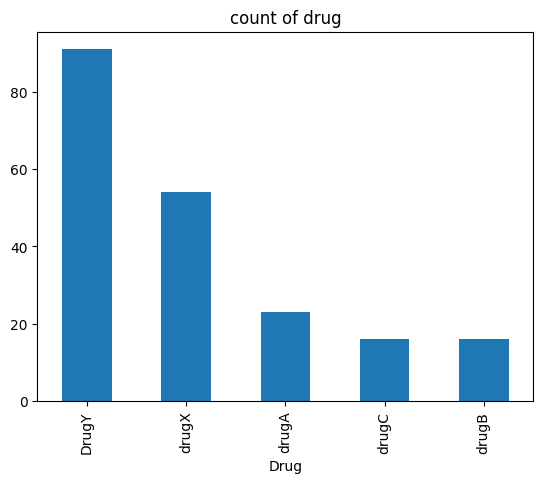

In [9]:
df['Drug'].value_counts().plot(kind='bar',title='count of drug')

sepearte x and y

In [10]:
x=df.drop(columns=['Drug'])
y=df[['Drug']]

In [11]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [12]:
y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


seperate cat and con from x

In [13]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [14]:
cat

['Sex', 'BP', 'Cholesterol']

In [15]:
con

['Age', 'Na_to_K']

create preprocessing pipeline

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [18]:
x_pre=pre.fit_transform(x)

In [19]:
x_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [21]:
cols=pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [22]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.465676,-0.859089,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,-1.291591,-0.286500,0.0,1.0,0.0,0.0,1.0,0.0,1.0


train test split

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,train_size=0.3,random_state=42)

In [24]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
180,-1.352186,0.934448,1.0,0.0,1.0,0.0,0.0,0.0,1.0
178,-0.322065,-0.016027,0.0,1.0,0.0,0.0,1.0,1.0,0.0
185,0.768653,1.361183,1.0,0.0,0.0,0.0,1.0,0.0,1.0
49,-0.988614,0.515068,1.0,0.0,0.0,1.0,0.0,1.0,0.0
80,0.950439,-0.298435,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [25]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


create random forest classifer

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1,max_depth=1,min_samples_split=5,min_samples_leaf=3,criterion='gini')

In [27]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [28]:
model.score(xtrain,ytrain)

0.5333333333333333

In [29]:
model.score(xtest,ytest)

0.42142857142857143

hyperparametric tunning

In [30]:
params={'n_estimators':[10,50,100,200],
        'max_depth':[2,3,4,5,6,7],
        'min_samples_split':[5,6,7,8,9],
        'criterion':['gini','entropy']}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
rscv=RandomizedSearchCV(rfc,param_distributions=params,cv=5,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [32]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'max_depth': 6,
 'criterion': 'gini'}

In [33]:
rscv.best_score_

0.8635897435897435

In [34]:
best_rfc=rscv.best_estimator_

In [35]:
best_rfc

RandomForestClassifier(max_depth=6, min_samples_split=6, n_estimators=200)

evaluate model 

In [36]:
best_rfc.score(xtrain,ytrain)

1.0

In [37]:
best_rfc.score(xtest,ytest)

0.95

predict result from test and train

In [38]:
ypred_tr=best_rfc.predict(xtrain)
ypred_ts=best_rfc.predict(xtest)

In [39]:
ypred_tr[0:5]

array(['DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugB'], dtype=object)

In [40]:
ytrain.head()

,Drug
180,DrugY
178,DrugY
185,DrugY
49,DrugY
80,drugB


In [41]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [42]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


create confusion matrics for x test

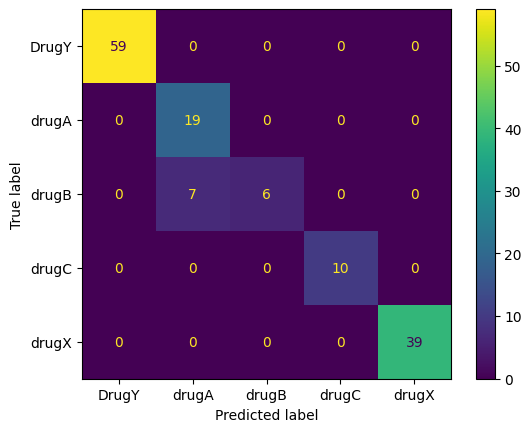

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

create a classification report 

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        59
       drugA       0.73      1.00      0.84        19
       drugB       1.00      0.46      0.63        13
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        39

    accuracy                           0.95       140
   macro avg       0.95      0.89      0.90       140
weighted avg       0.96      0.95      0.94       140



predict probability

In [48]:
yprob_tr=best_rfc.predict_proba(xtrain)

In [49]:
yprob_ts=best_rfc.predict_proba(xtest)

In [50]:
yprob_tr[0:5]

array([[0.94616847, 0.02228193, 0.01446627, 0.00875   , 0.00833333],
       [0.87373268, 0.00333333, 0.        , 0.00171429, 0.1212197 ],
       [0.89751786, 0.        , 0.003125  , 0.        , 0.09935714],
       [0.84145887, 0.        , 0.        , 0.12466613, 0.033875  ],
       [0.139693  , 0.3510435 , 0.40628533, 0.0392996 , 0.06367857]])

In [51]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

feature importance

In [52]:
imp=best_rfc.feature_importances_
imp

array([0.11408234, 0.53201116, 0.01476841, 0.01545592, 0.08954909,
       0.05856651, 0.09621868, 0.04651849, 0.0328294 ])

In [53]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [54]:
imp=pd.Series(imp)

In [55]:
imp

0    0.114082
1    0.532011
2    0.014768
3    0.015456
4    0.089549
5    0.058567
6    0.096219
7    0.046518
8    0.032829
dtype: float64

In [56]:
imp.index=xtrain.columns

In [57]:
imp=imp.sort_values(ascending=False)

<Axes: title={'center': 'feature imp'}>

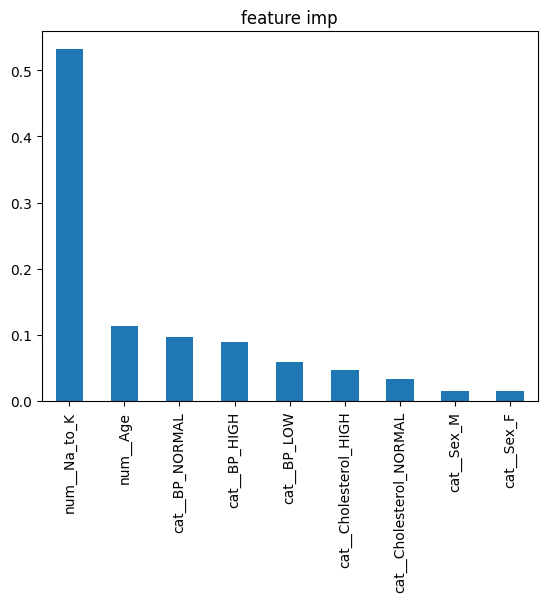

In [58]:
imp.plot(kind='bar',title='feature imp')

predicting out of sample data

In [60]:
xnew=pd.read_csv('test_drugs.csv')
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006


In [61]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [62]:
xnew_pre=pre.transform(xnew)
xnew_pre[0:5]

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [63]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0


prediciting result with probability 

In [64]:
pred=best_rfc.predict(xnew_pre)

pred

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [65]:
prob=best_rfc.predict_proba(xnew_pre)

In [66]:
import numpy as np

In [67]:
prob_max=np.max(prob,axis=1)
prob_max

array([0.80647817, 0.36675796, 0.52922405, 0.92149116, 0.82386219,
       0.53346154, 0.91788907, 0.67197727, 0.87530159, 0.81060624,
       0.87923918, 0.82203626, 0.92536797, 0.95353553, 0.92018651,
       0.89991071, 0.94616847, 0.32589247, 0.91527543, 0.71437085,
       0.935125  , 0.82114484, 0.94616847, 0.3124663 , 0.93616847,
       0.90476984, 0.3556907 , 0.81460624, 0.42332524, 0.82951245])

save the above data

In [68]:
xnew['Drug_pred']=pred
xnew['Drug_prob']=prob_max

In [69]:
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,Drug_prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.806478
1,35,F,HIGH,HIGH,12.894,drugA,0.366758
2,48,M,HIGH,NORMAL,10.446,drugA,0.529224
3,40,F,NORMAL,HIGH,10.103,drugX,0.921491
4,16,M,LOW,HIGH,12.006,drugC,0.823862


In [70]:
xnew['Drug_pred'].value_counts()

Drug_pred
DrugY    16
drugA     5
drugC     4
drugX     3
drugB     2
Name: count, dtype: int64

<Axes: title={'center': 'count of pred_drug'}, xlabel='Drug_pred'>

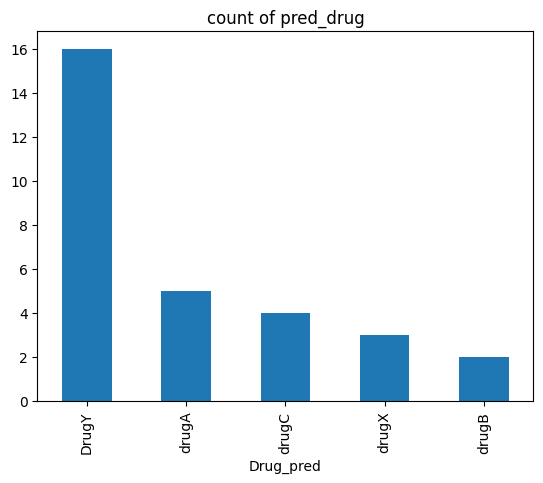

In [71]:
xnew['Drug_pred'].value_counts().plot(kind='bar',title='count of pred_drug')

In [72]:
xnew.to_csv('rfcresult.csv',index=False)